In [1]:
from datasets import load_dataset, concatenate_datasets
import pandas as pd
import os
from matplotlib import pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import cv2

/media/mausneg/ntfs_disk/Surya/Language Programming/Python/Facial-Recognition/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dataset = load_dataset("HuggingFaceM4/FairFace", '0.25', split='train')
val_dataset = load_dataset("HuggingFaceM4/FairFace", '0.25', split='validation')

In [3]:
print(train_dataset)

Dataset({
    features: ['image', 'age', 'gender', 'race', 'service_test'],
    num_rows: 86744
})


In [4]:
print(val_dataset)

Dataset({
    features: ['image', 'age', 'gender', 'race', 'service_test'],
    num_rows: 10954
})


6 0 0


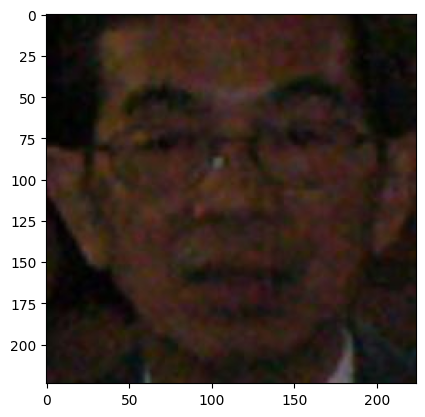

In [5]:
plt.imshow(train_dataset[0]['image'])
print(train_dataset[0]['age'],train_dataset[0]['gender'],train_dataset[0]['race'])

In [6]:
convert_age = {
    0: 0,
    1: 0,
    2: 1,
    3: 2,
    4: 2,
    5: 2,
    6: 3,
    7: 3,
    8: 3,
}

convert_race = {
    0: 2,
    1: 3,
    2: 1,
    3: 0,
    4: 4,
    5: 4,
    6: 2,
}

In [7]:
merge = concatenate_datasets([
    train_dataset,
    val_dataset
])

del train_dataset, val_dataset

In [8]:
df_label = pd.DataFrame(data={
    'age_group': merge['age'],
    'gender': merge['gender'], 
    'race': merge['race']
    })

In [9]:
df_label['age_group'] = df_label['age_group'].map(convert_age)
df_label['race'] = df_label['race'].map(convert_race)

In [10]:
df_label

,age_group,gender,race
0,3,0,2
1,2,1,3
2,0,1,1
3,2,1,3
4,2,1,3
...,...,...,...
97693,2,0,0
97694,3,0,0
97695,3,0,4
97696,2,1,2


In [11]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97698 entries, 0 to 97697
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age_group  97698 non-null  int64
 1   gender     97698 non-null  int64
 2   race       97698 non-null  int64
dtypes: int64(3)
memory usage: 2.2 MB


In [12]:
def save_image(image, label, i):
    image = np.array(image).reshape(224, 224, 3).astype(np.uint8)
    image = cv2.resize(image, (150, 150))
    plt.imsave(f'data/FairFace/{label[1]["age_group"]}_{label[1]["gender"]}_{label[1]["race"]}_{i}.jpg', image)
with ThreadPoolExecutor(max_workers=6) as executor:
    for i, (image, label) in enumerate(zip(merge['image'], df_label.iterrows())):
        executor.submit(save_image, image, label, i)